In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
import pickle

import readdy_learn.example.predator_prey as pp

In [4]:
TARGET_TIME = 20
pp.TIMESTEP = 1e-1

In [5]:
time, count, dcount_dt = pp.generate_lma(0, TARGET_TIME)
len(time)

200

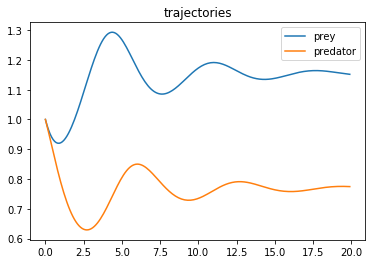

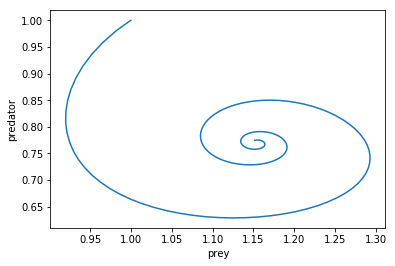

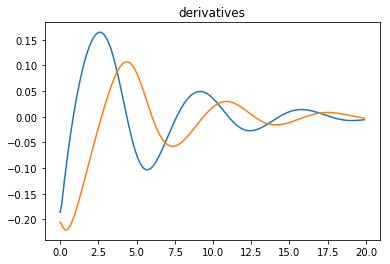

In [6]:
plt.plot(time, count[:, 0], label='prey')
plt.plot(time, count[:, 1], label='predator')
plt.title('trajectories')
plt.legend()
plt.show()

plt.plot(count[:, 0], count[:, 1])
plt.xlabel('prey')
plt.ylabel('predator')
plt.show()

plt.plot(time,  dcount_dt)
plt.title('derivatives')
plt.show()

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
91 / 30000 iterations


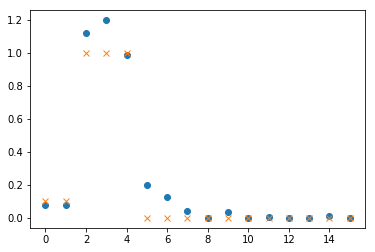

In [7]:
X = pp.solve(count, dcount_dt, 0., 1.)
#print("Absolute error:", X-pp.RATES)
#print("Relative error:", (X - pp.RATES) / pp.RATES)
plt.plot(X, 'o')
plt.plot(pp.RATES, 'x')

In [8]:
result = pp.solve_grid(counts=count, dcounts_dt=dcount_dt, alphas=np.logspace(-10, -3, num=100), 
                      l1_ratios=1., njobs=8)

Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2570197196339168e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
optimization problem did exit successfully (alpha=1.9179102616724848e-10, lambda=1.0)!
status 0: Optimization terminated successfully.
106 / 30000 iterations
optimization problem did exit successfully (alpha=1.6297508346206467e-10, lambda=1.0)!
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.3848863713938747e-10, lambda=1.0)!
106 / 30000 iterations
optimization problem did exit successfully (alpha=1.176811952434999e-10, lambda=1.0)!
Trying tolerance 1e-16
status 0: Optimization terminated successfully.
status 0: Optimization terminated successfully.
status 0: Optimization terminated successfully.
optimization problem did exit successfully (alpha=

optimization problem did exit successfully (alpha=9.3260334688322e-08, lambda=1.0)!
status 0: Optimization terminated successfully.
status 0: Optimization terminated successfully.
149 / 30000 iterations
144 / 30000 iterations
Trying tolerance 1e-16
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.7886495290574352e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
145 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.104904144512022e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
142 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.4770763559917087e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
147 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.915053062825176e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
144 / 30000 iterations
Trying tolerance 1e-16
optimi

optimization problem did exit successfully (alpha=0.00019630406500402683, lambda=1.0)!
status 0: Optimization terminated successfully.
status 0: Optimization terminated successfully.
status 0: Optimization terminated successfully.
optimization problem did exit successfully (alpha=0.00044306214575838776, lambda=1.0)!
optimization problem did exit successfully (alpha=0.00027185882427329403, lambda=1.0)!
70 / 30000 iterations
65 / 30000 iterations
Trying tolerance 1e-16
Trying tolerance 1e-16
status 0: Optimization terminated successfully.
status 0: Optimization terminated successfully.
62 / 30000 iterations
optimization problem did exit successfully (alpha=0.0003764935806792464, lambda=1.0)!
79 / 30000 iterations
status 0: Optimization terminated successfully.
66 / 30000 iterations
Trying tolerance 1e-16
64 / 30000 iterations
optimization problem did exit successfully (alpha=0.0005214008287999684, lambda=1.0)!
status 0: Optimization terminated successfully.
62 / 30000 iterations
optimiza

In [9]:
alphas = np.array([res[0] for res in result])
sort = np.argsort(alphas)
alphas = alphas[sort]
estimated_rates = np.array([res[2] for res in result])
estimated_rates = estimated_rates[sort]
l1_errs = np.sum(np.abs(estimated_rates - pp.RATES), axis=1)

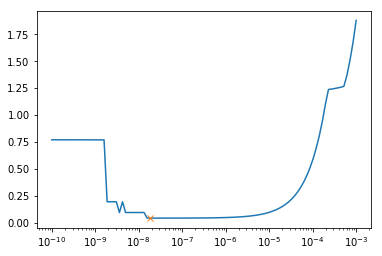

In [10]:
plt.semilogx(alphas, l1_errs)
plt.plot([alphas[np.argmin(l1_errs)]], [l1_errs[np.argmin(l1_errs)]], 'x')

In [11]:
best_estimated_rates = estimated_rates[np.argmin(l1_errs)]

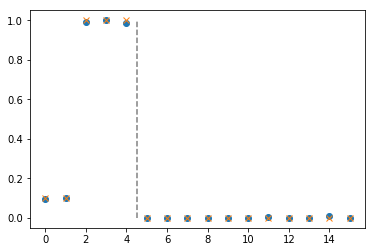

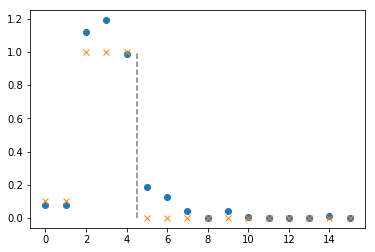

In [12]:
plt.plot(best_estimated_rates, 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(pp.RATES, 'x')
plt.show()
plt.plot(estimated_rates[0], 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(pp.RATES, 'x')
plt.show()

In [13]:
N = np.arange(len(count))
np.random.shuffle(N)
shuffled_count = count[N]
shuffled_dcount_dt = dcount_dt[N]

In [14]:
res = pp.cv(shuffled_count, shuffled_dcount_dt, alphas=np.logspace(-9, -4, num=100), n_splits=5, njobs=8)

validating across grid with 100 alphas, 1 lambdas, 1 cutoffs with 1 realizations


Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Solving for tolerance 1e-16

Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 3

 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Running kfold with n_splits=5

Solving for tolerance 1e-16
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 4

 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104

 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91 

 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test:

 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 1

 156 157 158 159]
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 1

 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 1

 156 157 158 159]
Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159]Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]Solving for tolerance 1e-16

Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 

 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16
Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]Test: [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199]
Solving for tolerance 1e-16

Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Sol

 196 197 198 199]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Running kfold with n_splits=5

Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Running kfold with n_splits=5
Running kfold with n_splits=5
Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Solving for toler

 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]Solving for tolerance 1e-16

Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
Solving for tolerance 1e-16
Test: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  

In [16]:
alphas = []
scores = []
all_scores = []
scores_std = []
cv_result = res
for res in cv_result['cv_result']:
    alphas.append(res['alpha'])
    scores.append(np.mean(res['score']))
    scores_std.append(np.std(res['score']))
    all_scores.append(res['score'])
alphas = np.array(alphas)
scores = np.array(scores)
scores_std = np.array(scores_std)
all_scores = np.array(all_scores)
N = np.argsort(alphas)
alphas = alphas[N]
scores = scores[N]
scores_std = scores_std[N]
all_scores = all_scores[N]

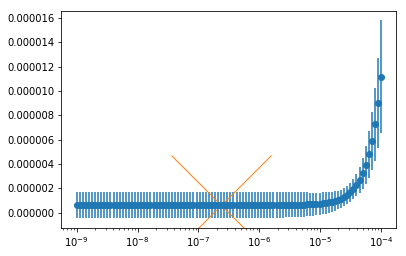

In [17]:
plt.xscale('log')
plt.errorbar(alphas, -scores, yerr=scores_std, fmt='o')
plt.plot([alphas[np.argmin(-scores)]], [-scores[np.argmin(-scores)]], 'x', markersize=100)
#plt.ylim([4.447e8, 4.46e8])

In [19]:
rates = pp.solve(shuffled_count, shuffled_dcount_dt, alpha=alphas[np.argmin(-scores)], l1_ratio=1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3644894126454072e-07, lambda=1.0)!
status 0: Optimization terminated successfully.
146 / 30000 iterations


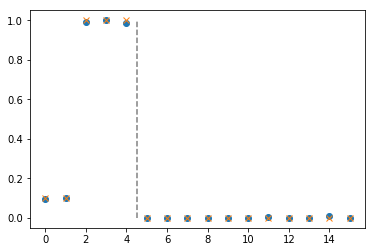

In [20]:
plt.plot(rates, 'o')
plt.vlines([4.5], 0, 1, 'grey', 'dashed')
plt.plot(pp.RATES, 'x')
plt.show()

In [7]:
cv = pp.cv(count, dcount_dt, alphas=np.logspace(-5, -4, num=20), n_splits=15, njobs=5)

validating across grid with 20 alphas, 1 lambdas, 1 cutoffs with 1 realizations


Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-14
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-12
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for tolerance 1e-14
Solving for tolerance 1e-14
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for toleranc

Solving for tolerance 1e-13
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for tolerance 1e-12
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-12
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-13
Solving for toleranc

Solving for tolerance 1e-13
Solving for tolerance 1e-12
Solving for tolerance 1e-11
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-12
Solving for tolerance 1e-11
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-12
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14
Solving for tolerance 1e-13
Solving for tolerance 1e-12
Solving for tolerance 1e-11


In [8]:
cv

{'cv_result': [{'alpha': 1e-05,
   'l1_ratio': 1.0,
   'cutoff': 0.0,
   'score': [-445501275780.4066,
    -4811267891.464783,
    -3243820702.170389,
    -1662009773.9992006,
    -8275788548.200195,
    -1364222875.627004,
    -560203487.0248941,
    -537728612.848455,
    -303055355.20294875,
    -2039604357.1003377,
    -410793495.40156764,
    -63742535.89031601,
    -44966538.65119183,
    -321891528.846624,
    -3493625187.268686]},
  {'alpha': 1.1288378916846883e-05,
   'l1_ratio': 1.0,
   'cutoff': 0.0,
   'score': [-445501275686.2591,
    -4811268422.954202,
    -3243820791.375348,
    -1662009875.720871,
    -8275789105.912109,
    -1364217837.7404325,
    -560203488.9544685,
    -537729066.6062032,
    -303055332.0804858,
    -2039605406.661693,
    -410802120.5570772,
    -63742486.73692722,
    -44966551.57381655,
    -321879972.27542645,
    -3493633703.76075]},
  {'alpha': 1.438449888287663e-05,
   'l1_ratio': 1.0,
   'cutoff': 0.0,
   'score': [-445501275525.0623,
    -

In [14]:
time, count, dcount_dt = pp.generate_kmc(0, TARGET_TIME, n_realizations=3, njobs=6)

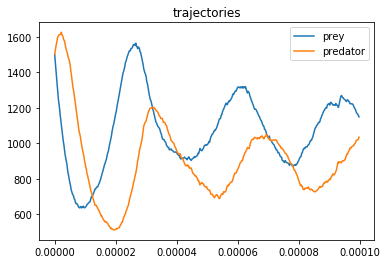

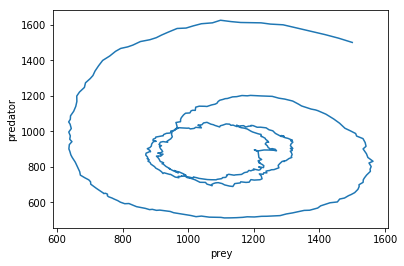

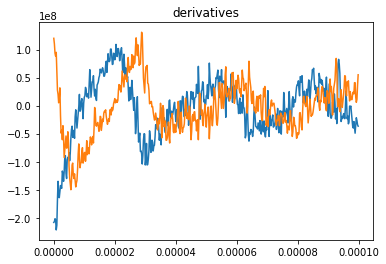

In [15]:
plt.plot(time, count[:, 0], label='prey')
plt.plot(time, count[:, 1], label='predator')
plt.title('trajectories')
plt.legend()
plt.show()

plt.plot(count[:, 0], count[:, 1])
plt.xlabel('prey')
plt.ylabel('predator')
plt.show()

plt.plot(time,  dcount_dt)
plt.title('derivatives')
plt.show()

In [16]:
X = pp.solve(count, dcount_dt, 0., 1.)
print("Relative error:", (X - pp.RATES) / pp.RATES)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
9 / 30000 iterations
Relative error: [ 0.26977588 -0.14615862  0.03913712  0.01234644  0.02986762]
